In [1]:
!pip install transformers accelerate torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 KB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 27.0 MB/s eta 0:00:00


In [2]:
!pip install git+https://github.com/huggingface/diffusers.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-tscq0dgy
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-tscq0dgy
  Resolved https://github.com/huggingface/diffusers.git to commit 1e216be8950d22813b975a4d026e58011cd78162
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.13.0.dev0-py3-none-any.whl size=612999 sha256=5782c229daedb1db7333d8c1c8aee9f4a5ddb7cb34b0e67a8573b77eaccb9cc7
  Stored in directory: /tmp/pip-ephem-wheel-cache-j2u1sdz6/wheels/28/16/cf/d8d37579fd1e7edb978252d850ec9328b055a7582ddfae3b87
Successfully built diffusers


In [3]:
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [4]:
%%capture
!wget https://raw.githubusercontent.com/timothybrooks/instruct-pix2pix/main/imgs/example.jpg

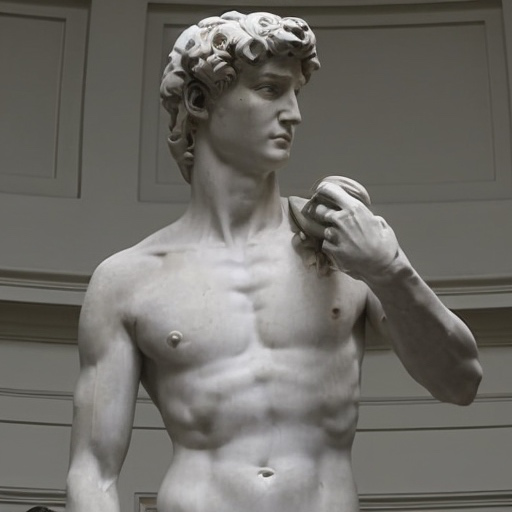

In [5]:
import PIL
image = PIL.Image.open("./example.jpg")
image = PIL.ImageOps.exif_transpose(image)
image = image.convert("RGB")
image

  0%|          | 0/20 [00:00<?, ?it/s]

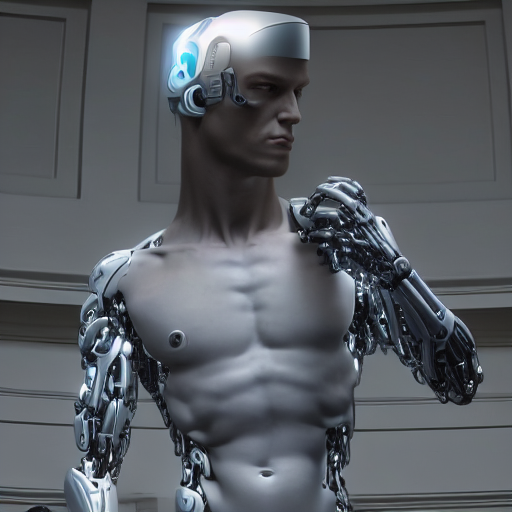

In [6]:
prompt = "turn him into cyborg"
pipe(prompt, image=image, num_inference_steps=20, image_guidance_scale=1).images[0]

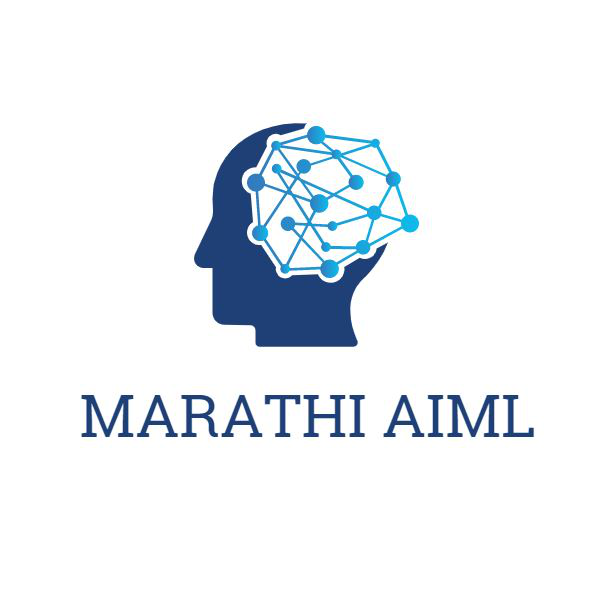

In [7]:
import PIL
image = PIL.Image.open("./marathi_logo.JPG")
image = PIL.ImageOps.exif_transpose(image)
image = image.convert("RGB")
image

  0%|          | 0/20 [00:00<?, ?it/s]

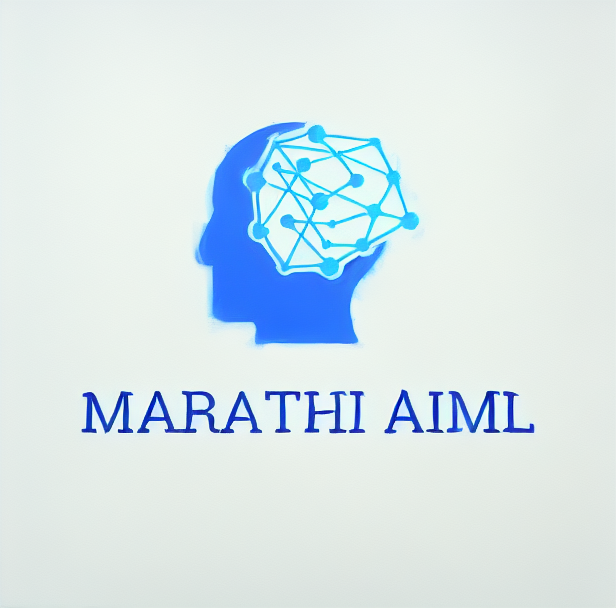

In [8]:
prompt = "make a painting"
pipe(prompt, image=image, num_inference_steps=20, image_guidance_scale=1).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

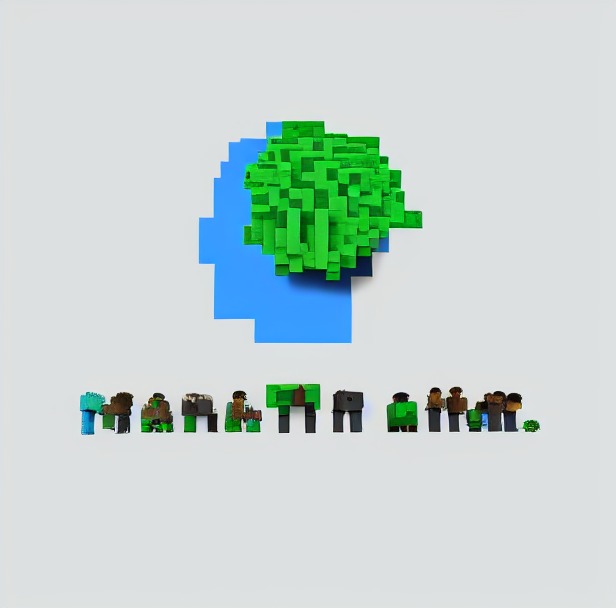

In [9]:
prompt = "make a minecraft"
pipe(prompt, image=image, num_inference_steps=20, image_guidance_scale=1).images[0]